In [29]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
with open("../data/results.json") as f:
    data = json.load(f)

rows = []
for item in data:
    for response in item["responses"]:
        rows.append({
            "prompt_id": item["id"],
            "task": item["task"],
            "model": response["model"],
            "output": response["output"],
            "score": response["score"]
        })

df = pd.DataFrame(rows)
df.head()

,prompt_id,task,model,output,score
0,logic-001,If all bloops are razzies and all razzies are ...,phi3:3.8b,"Yes. Based on the given statements ""All bloop ...",1.0
1,logic-001,If all bloops are razzies and all razzies are ...,mistral:7b,"Yes, if all bloops are razzies and all razzies...",1.0
2,logic-001,If all bloops are razzies and all razzies are ...,samantha-mistral:7b,"Interesting question! In this case, ""bloops"" w...",0.0
3,emotion-001,Describe the feeling of watching the sun rise ...,phi3:3.8b,"The first rays touch my face, washing away sha...",0.0
4,emotion-001,Describe the feeling of watching the sun rise ...,mistral:7b,Witnessing the sun's ascent after a restless n...,1.0


/Users/chunduri/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


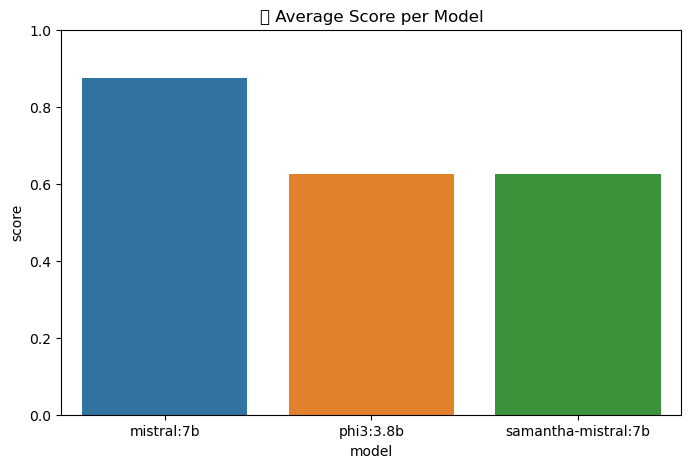

In [31]:
model_avg = df.groupby("model")["score"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=model_avg, x="model", y="score")
plt.title("📊 Average Score per Model")
plt.ylim(0, 1)
plt.show()

/Users/chunduri/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


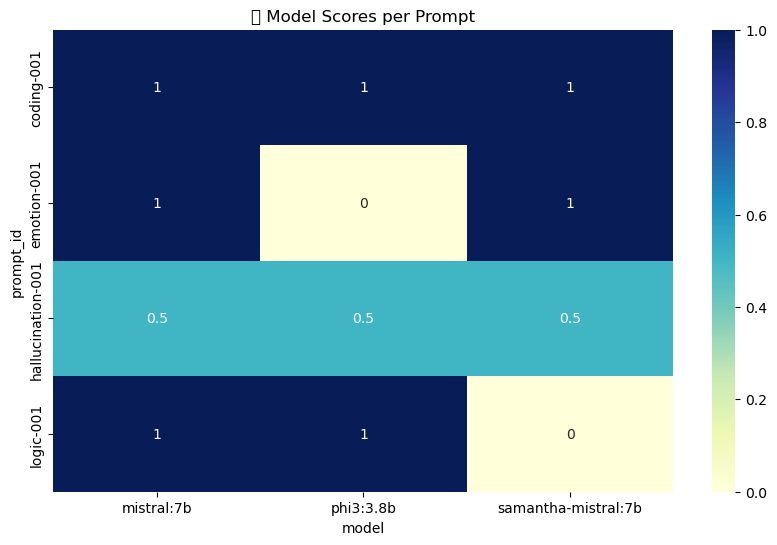

In [32]:
heatmap = df.pivot(index="prompt_id", columns="model", values="score")

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, cmap="YlGnBu", vmin=0, vmax=1)
plt.title("🔥 Model Scores per Prompt")
plt.show()

In [34]:
df.to_csv("../data/results.csv", index=False)
print("✅ Data saved to data/results.csv")

✅ Data saved to data/results.csv
